In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/Colab Notebooks/CS 520'

/content/drive/MyDrive/Colab Notebooks/CS 520


In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('emails.csv')

In [5]:
data.shape

(5172, 3002)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [7]:
data.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [8]:
data['Prediction'].value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [9]:
data.drop('Email No.', axis=1, inplace=True)

In [10]:
X = data.drop('Prediction', axis=1)
y = data['Prediction']

In [11]:
X.shape

(5172, 3000)

In [12]:
y.shape

(5172,)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
y_train.value_counts()

0    2933
1    1204
Name: Prediction, dtype: int64

Functions

In [15]:
def learning(X_train, y_train, X_test, y_test, model):
  model=model.fit(X_train, y_train)
  print('Training set accuracy: ', model.score(X_train, y_train))
  print('Testing set accuracy: ', model.score(X_test, y_test))
  return model

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
def search_parameters(model, parameters, X_train, y_train):
  grid=GridSearchCV(model, param_grid=parameters, cv=10)
  grid.fit(X_train, y_train)
  print('Cross Validation Process:')
  display(pd.DataFrame(grid.cv_results_))
  print('Best Parameters: ', grid.best_params_)
  print('Accuracy on training set using best parameter: ', grid.score(X_train, y_train))

K-Nearest Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

In [19]:
neighs={'n_neighbors': np.arange(1, 16, 1)}
knn=KNeighborsClassifier()
print("Searching K for KNN:")
search_parameters(knn, neighs, X_train, y_train)

Searching K for KNN:
Cross Validation Process:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.151477,0.018201,0.688693,0.072657,1,{'n_neighbors': 1},0.840580,0.864734,0.886473,0.876812,0.857488,0.862319,0.835749,0.857143,0.895884,0.859564,0.863675,0.017731,15
1,0.121388,0.011604,0.448710,0.087029,2,{'n_neighbors': 2},0.864734,0.896135,0.867150,0.876812,0.893720,0.879227,0.859903,0.883777,0.878935,0.876513,0.877691,0.011116,2
2,0.123828,0.009466,0.499344,0.131693,3,{'n_neighbors': 3},0.862319,0.876812,0.867150,0.879227,0.869565,0.871981,0.850242,0.832930,0.883777,0.859564,0.865357,0.014319,14
3,0.136707,0.017225,0.604755,0.144610,4,{'n_neighbors': 4},0.881643,0.893720,0.855072,0.884058,0.891304,0.891304,0.862319,0.883777,0.878935,0.859564,0.878170,0.013403,1
4,0.115284,0.006872,0.427654,0.013642,5,{'n_neighbors': 5},0.864734,0.871981,0.869565,0.886473,0.881643,0.884058,0.828502,0.864407,0.881356,0.854722,0.868744,0.016542,8
5,0.127893,0.013351,0.603969,0.138320,6,{'n_neighbors': 6},0.855072,0.893720,0.855072,0.893720,0.888889,0.881643,0.850242,0.874092,0.878935,0.857143,0.872853,0.016230,3
6,0.126640,0.020538,0.505702,0.120520,7,{'n_neighbors': 7},0.864734,0.879227,0.864734,0.881643,0.862319,0.879227,0.840580,0.861985,0.876513,0.857143,0.866811,0.012067,11
7,0.116065,0.002969,0.427644,0.010865,8,{'n_neighbors': 8},0.852657,0.886473,0.850242,0.891304,0.871981,0.879227,0.855072,0.871671,0.871671,0.861985,0.869228,0.013387,6
8,0.142605,0.011142,0.683086,0.120312,9,{'n_neighbors': 9},0.867150,0.859903,0.864734,0.876812,0.869565,0.876812,0.850242,0.861985,0.878935,0.866828,0.867297,0.008380,9
9,0.114962,0.003971,0.426230,0.006630,10,{'n_neighbors': 10},0.857488,0.874396,0.845411,0.893720,0.867150,0.874396,0.857488,0.871671,0.886199,0.869249,0.869717,0.013387,4


Best Parameters:  {'n_neighbors': 4}
Accuracy on training set using best parameter:  0.9296591733139956


4-NN model performance: 
Training set accuracy:  0.9296591733139956
Testing set accuracy:  0.8676328502415459


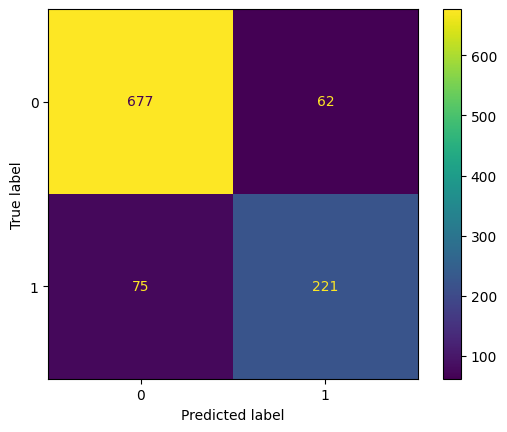

In [20]:
neighbor=KNeighborsClassifier(n_neighbors=4)
print('4-NN model performance: ')
learning(X_train, y_train, X_test, y_test, neighbor)

test_predict=neighbor.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, test_predict)

Logistic Regression

In [21]:
from sklearn.linear_model import Perceptron, LogisticRegression

In [22]:
parameters={'C':[0.01, 0.1, 1, 10, 100]}
lg=LogisticRegression(max_iter=10000)
print("Logistic Regression Searching Parameters: ")
search_parameters(lg, parameters, X_train, y_train)

Logistic Regression Searching Parameters: 
Cross Validation Process:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,7.528524,0.722999,0.064743,0.023974,0.01,{'C': 0.01},0.968599,0.961353,0.961353,0.942029,0.966184,0.963768,0.954106,0.975787,0.946731,0.970944,0.961085,0.010105,5
1,11.860855,0.950531,0.069028,0.026818,0.1,{'C': 0.1},0.973430,0.985507,0.971014,0.951691,0.973430,0.966184,0.951691,0.975787,0.968523,0.980630,0.969789,0.010480,2
2,16.477180,0.924364,0.048904,0.006256,1,{'C': 1},0.968599,0.983092,0.973430,0.968599,0.980676,0.963768,0.949275,0.978208,0.963680,0.983051,0.971238,0.010157,1
3,22.521889,1.118003,0.058444,0.019989,10,{'C': 10},0.958937,0.987923,0.975845,0.971014,0.975845,0.961353,0.937198,0.970944,0.961259,0.978208,0.967853,0.013275,3
4,29.873967,1.993195,0.058804,0.017729,100,{'C': 100},0.958937,0.987923,0.975845,0.966184,0.975845,0.958937,0.939614,0.966102,0.961259,0.973366,0.966401,0.012432,4


Best Parameters:  {'C': 1}
Accuracy on training set using best parameter:  0.9995165578921924


In [23]:
model=LogisticRegression(max_iter=1000, C=1)

In [24]:
learning(X_train, y_train, X_test, y_test, model)

Training set accuracy:  0.9995165578921924
Testing set accuracy:  0.9719806763285024


LogisticRegression(C=1, max_iter=1000)

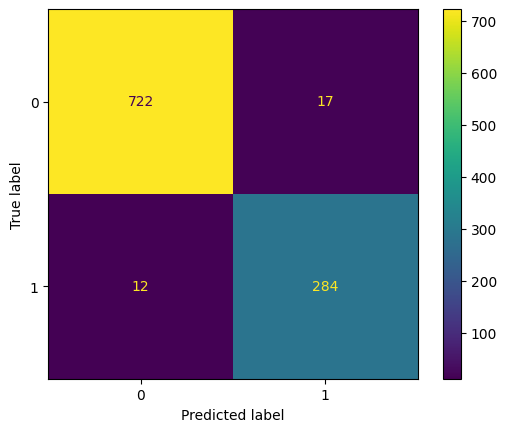

In [25]:
test_predict=model.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, test_predict)

Perceptron

In [26]:
per=Perceptron()
per.fit(X_train, y_train)

Perceptron()

In [27]:
print("Training score: ", per.score(X_train, y_train))
print("Testing score: ", per.score(X_test, y_test))

Training score:  0.8929175731206188
Testing score:  0.9033816425120773


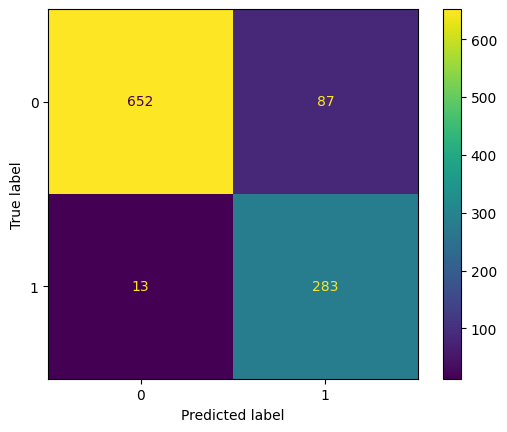

In [28]:
test_predict=per.predict(X_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test, test_predict)